In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sheets = pd.read_excel('Data/Ne phase shift summary, 2018-10-24.xlsx', sheet_name=None)

for sheet in sheets.values():
    sheet.sort_values('Photon (eV)', inplace=True)
groupped = {
    k: v.groupby('Photon (eV)').mean()
    for k, v in sheets.items()
}

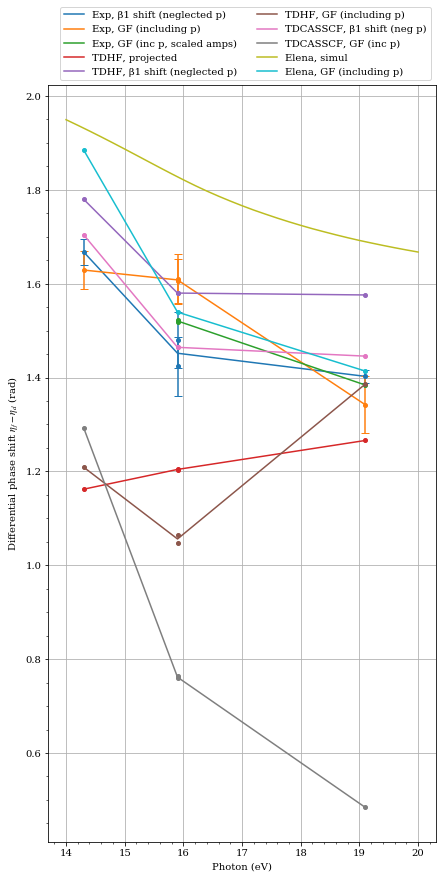

In [10]:
plt.style.use('Report.mplstyle')
plt.figure(figsize=(6, 12))
plt.xlabel('Photon (eV)')
plt.ylabel(r'Differential phase shift $\eta_f-\eta_d$ (rad)')

prop = plt.rcParams['axes.prop_cycle']
for k, p in zip(sheets, prop):
    plt.plot([], '-', label=k, **p)
    plt.plot(groupped[k]['Phase shift (rad)'], '-', label='', **p)
    if 'Phase shift error (rad)' in sheets[k]:
        plt.errorbar(sheets[k]['Photon (eV)'],
                     sheets[k]['Phase shift (rad)'],
                     yerr=sheets[k]['Phase shift error (rad)'],
                     fmt='o', label='', **p)
    else:
        if not k.endswith("simul"):
            plt.plot(sheets[k]['Photon (eV)'], sheets[k]['Phase shift (rad)'], 'o', label='', **p)
plt.grid(True)
plt.legend(loc='lower right', bbox_to_anchor=(1, 1), ncol=2)
plt.tight_layout(pad=0)
plt.savefig(f"Figures/Compare Ne phase shifts.pdf")
plt.show()